<a href="https://colab.research.google.com/github/victor-onoja/DeepLearningLearning/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 130
all_scores = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

print(all_scores)
print(np.mean(all_scores))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3
[1.8413702249526978, 2.450035572052002, 2.472498893737793, 2.5193967819213867]
2.32082536816597


Processing fold #(i)
Processing fold #(i)
Processing fold #(i)
Processing fold #(i)


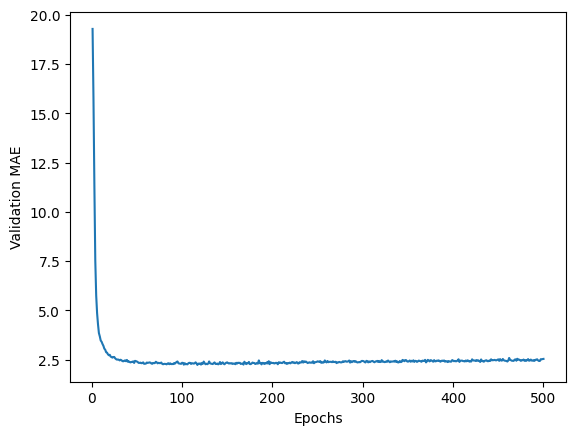

In [3]:
import matplotlib.pyplot as plt

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # prepares the training data: data from partition #k
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0) # prepares the training data: data from all other partitions
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model() # Builds the Keras model (already compiled)
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=16, verbose=0) # Trains the model (in silent mode, verbose = 0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]


plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [4]:
model = build_model() # freshly compiled model from the function created earlier
model.fit(train_data, train_targets, epochs=130, batch_size=16, verbose=0) # train on the entire data
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.5651 - mae: 2.1999


In [5]:
predictions = model.predict(test_data)
print(predictions[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[7.089668]
